In [1]:
import numpy as np
import pandas as pd
import keras, hyperas, hyperopt, tensorflow
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [2]:
from __future__ import print_function

from hyperopt import Trials, STATUS_OK, tpe
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

from hyperas import optim
from hyperas.distributions import choice, uniform

In [31]:
### generate 3 clusters of random points of dimension 3 based on position
def generate_data2():
    np.random.seed(0)
    n = 500
    x1 = np.random.multivariate_normal([0, 0, 0], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], n)
    x2 = np.random.multivariate_normal([0, 5, 0], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], n)
    x3 = np.random.multivariate_normal([5, 0, 0], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], n)
    x = np.concatenate((x1, x2, x3), axis=0)
    y = np.asarray([0]*n + [1]*n + [2]*n)
    return x, y
def generate_data():
    np.random.seed(0)
    n = 500
    x1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], n)
    x2 = np.random.multivariate_normal([0, 5], [[1, 0], [0, 1]], n)
    x3 = np.random.multivariate_normal([5, 0], [[1, 0], [0, 1]], n)
    x = np.concatenate((x1, x2, x3), axis=0)
    y = np.asarray([0]*n + [1]*n + [2]*n)
    return x, y

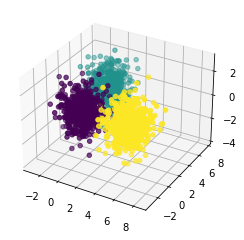

In [32]:
pt,y = generate_data2()
### graph the data in dimesnion 3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pt[:,0], pt[:,1], pt[:,2], c=y)
plt.show()

In [40]:
### transform points to dataframe 
df_pt = pd.DataFrame(pt)
df_pt.head()

,0,1,2
0,1.764052,0.400157,0.978738
1,2.240893,1.867558,-0.977278
2,0.950088,-0.151357,-0.103219
3,0.410599,0.144044,1.454274
4,0.761038,0.121675,0.443863


### Autoencoder

In [41]:
def auto_encoder(n, n_a, df):

    input_df = keras.Input((n,))
    x = Dense(7, activation = 'relu')(input_df)
    x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
    encoded = Dense(n_a, activation = 'relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
    x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
    decoded = Dense(n, kernel_initializer='glorot_uniform')(x)
    autoencoder = keras.Model(input_df, decoded)
    encoder = keras.Model(input_df, encoded)
    autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

    autoencoder.fit(df, df, batch_size= 120, epochs = 25, verbose = 1)
    pred = encoder.predict(df)

    return pred

In [42]:
pred = auto_encoder(3, 2, df_pt)
pred

Epoch 1/25
13/13 [==============================] - 2s 29ms/step - loss: 3.9790
Epoch 2/25
13/13 [==============================] - 0s 28ms/step - loss: 0.9596
Epoch 3/25
13/13 [==============================] - 0s 28ms/step - loss: 0.5615
Epoch 4/25
13/13 [==============================] - 0s 29ms/step - loss: 0.4583
Epoch 5/25
13/13 [==============================] - 0s 29ms/step - loss: 0.4110
Epoch 6/25
13/13 [==============================] - 0s 28ms/step - loss: 0.3836
Epoch 7/25
13/13 [==============================] - 0s 31ms/step - loss: 0.3682
Epoch 8/25
13/13 [==============================] - 0s 31ms/step - loss: 0.3518
Epoch 9/25
13/13 [==============================] - 0s 27ms/step - loss: 0.3374
Epoch 10/25
13/13 [==============================] - 0s 27ms/step - loss: 0.3430
Epoch 11/25
13/13 [==============================] - 0s 31ms/step - loss: 0.3324
Epoch 12/25
13/13 [==============================] - 0s 29ms/step - loss: 0.3295
Epoch 13/25
13/13 [==================

array([[1.5297812 , 0.44444695],
       [2.6781852 , 1.8937455 ],
       [1.1127633 , 0.5538985 ],
       ...,
       [3.8308876 , 1.7615551 ],
       [4.1181083 , 1.1001335 ],
       [3.8080087 , 1.7728361 ]], dtype=float32)

In [47]:
df_pred = pd.DataFrame(pred)
#df_head.to_csv('pred.csv')

,0,1
0,1.529781,0.444447
1,2.678185,1.893746
2,1.112763,0.553899
3,0.341131,1.784890
4,1.097207,0.459301


### With KMeans

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df)

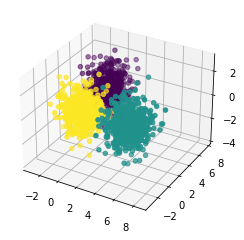

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pt[:,0], pt[:,1], pt[:,2], c=y_kmeans)
plt.show()

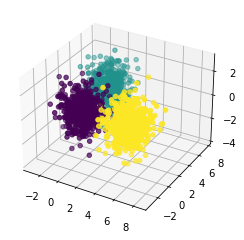

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pt[:,0], pt[:,1], pt[:,2], c=y)
plt.show()